In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = 'training'

In [3]:
images=glob.glob(os.path.join(PATH,'images','*.tif'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.GIF'))
if not os.path.exists('./training/output_images'):
    os.makedirs('./training/output_images')
if not os.path.exists('./training/output_1st_manual'):
    os.makedirs('./training/output_1st_manual')
src = "./training/images/"
dst = "./training/output_images/"
src1= "./training/1st_manual/"
dst1 = "./training/output_1st_manual/"

In [4]:
cropheight=200
cropwidth = 200
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

training\images\21_training.tif (0, 0, 200, 200)
training\images\21_training.tif (0, 200, 200, 400)
training\images\21_training.tif (0, 400, 200, 600)
training\images\21_training.tif (200, 0, 400, 200)
training\images\21_training.tif (200, 200, 400, 400)
training\images\21_training.tif (200, 400, 400, 600)
training\images\21_training.tif (400, 0, 600, 200)
training\images\21_training.tif (400, 200, 600, 400)
training\images\21_training.tif (400, 400, 600, 600)
training\images\22_training.tif (0, 0, 200, 200)
training\images\22_training.tif (0, 200, 200, 400)
training\images\22_training.tif (0, 400, 200, 600)
training\images\22_training.tif (200, 0, 400, 200)
training\images\22_training.tif (200, 200, 400, 400)
training\images\22_training.tif (200, 400, 400, 600)
training\images\22_training.tif (400, 0, 600, 200)
training\images\22_training.tif (400, 200, 600, 400)
training\images\22_training.tif (400, 400, 600, 600)
training\images\23_training.tif (0, 0, 200, 200)
training\images\23_tr

training\images\40_training.tif (400, 400, 600, 600)


In [5]:
cropheight=200
cropwidth = 200
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

training\1st_manual\21_manual1.gif (0, 0, 200, 200)
training\1st_manual\21_manual1.gif (0, 200, 200, 400)
training\1st_manual\21_manual1.gif (0, 400, 200, 600)
training\1st_manual\21_manual1.gif (200, 0, 400, 200)
training\1st_manual\21_manual1.gif (200, 200, 400, 400)
training\1st_manual\21_manual1.gif (200, 400, 400, 600)
training\1st_manual\21_manual1.gif (400, 0, 600, 200)
training\1st_manual\21_manual1.gif (400, 200, 600, 400)
training\1st_manual\21_manual1.gif (400, 400, 600, 600)
training\1st_manual\22_manual1.gif (0, 0, 200, 200)
training\1st_manual\22_manual1.gif (0, 200, 200, 400)
training\1st_manual\22_manual1.gif (0, 400, 200, 600)
training\1st_manual\22_manual1.gif (200, 0, 400, 200)
training\1st_manual\22_manual1.gif (200, 200, 400, 400)
training\1st_manual\22_manual1.gif (200, 400, 400, 600)
training\1st_manual\22_manual1.gif (400, 0, 600, 200)
training\1st_manual\22_manual1.gif (400, 200, 600, 400)
training\1st_manual\22_manual1.gif (400, 400, 600, 600)
training\1st_man

In [6]:
PATH1 = 'training'

In [7]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.jpg'))

In [8]:
def get_data(path, resize_dim=512):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [9]:
def get_data_gif(path, resize_dim=512):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [10]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(180, 512, 512)

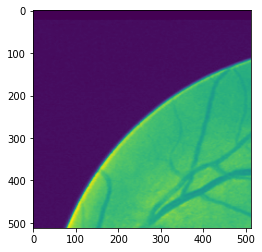

In [11]:
plt.imshow(orig_images[0])

In [12]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape

(180, 512, 512)

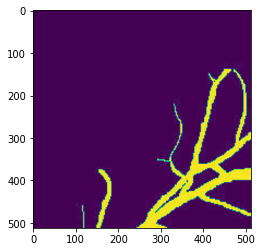

In [13]:
plt.imshow(masks[0])

In [14]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [15]:
masks.shape, orig_images.shape

((180, 512, 512, 1), (180, 512, 512, 1))

In [16]:
orig_images = orig_images / 255
masks = masks / 255

In [17]:
def get_unet():
    inputs = Input((512, 512, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [18]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 256, 256, 32) 0           conv2d_2[0][0]                  

In [19]:
model.fit(orig_images, masks, epochs = 500, batch_size= 16, shuffle = True, validation_split = 0.1)

Train on 162 samples, validate on 18 samples
Epoch 1/500
162/162 [==============================] - 285s 2s/step - loss: 0.6868 - accuracy: 0.6470 - val_loss: 0.6734 - val_accuracy: 0.7946
Epoch 2/500
162/162 [==============================] - 289s 2s/step - loss: 0.6538 - accuracy: 0.7850 - val_loss: 0.6161 - val_accuracy: 0.7949
Epoch 3/500
162/162 [==============================] - 303s 2s/step - loss: 0.5078 - accuracy: 0.7851 - val_loss: 0.4028 - val_accuracy: 0.7949
Epoch 4/500
162/162 [==============================] - 319s 2s/step - loss: 0.4131 - accuracy: 0.7851 - val_loss: 0.3675 - val_accuracy: 0.7949
Epoch 5/500
162/162 [==============================] - 321s 2s/step - loss: 0.3579 - accuracy: 0.7851 - val_loss: 0.2866 - val_accuracy: 0.7949
Epoch 6/500
162/162 [==============================] - 324s 2s/step - loss: 0.2777 - accuracy: 0.7851 - val_loss: 0.2393 - val_accuracy: 0.7949
Epoch 7/500
162/162 [==============================] - 327s 2s/step - loss: 0.2501 - accura

162/162 [==============================] - 321s 2s/step - loss: 0.1296 - accuracy: 0.7953 - val_loss: 0.1141 - val_accuracy: 0.8064
Epoch 58/500
162/162 [==============================] - 13353s 82s/step - loss: 0.1271 - accuracy: 0.7956 - val_loss: 0.1093 - val_accuracy: 0.8069
Epoch 59/500
162/162 [==============================] - 280s 2s/step - loss: 0.1260 - accuracy: 0.7955 - val_loss: 0.1177 - val_accuracy: 0.8048
Epoch 60/500
162/162 [==============================] - 275s 2s/step - loss: 0.1269 - accuracy: 0.7956 - val_loss: 0.1212 - val_accuracy: 0.8040
Epoch 61/500
162/162 [==============================] - 275s 2s/step - loss: 0.1269 - accuracy: 0.7953 - val_loss: 0.1089 - val_accuracy: 0.8068
Epoch 62/500
162/162 [==============================] - 278s 2s/step - loss: 0.1216 - accuracy: 0.7966 - val_loss: 0.1069 - val_accuracy: 0.8073
Epoch 63/500
162/162 [==============================] - 280s 2s/step - loss: 0.1206 - accuracy: 0.7969 - val_loss: 0.1045 - val_accuracy: 0.

162/162 [==============================] - 317s 2s/step - loss: 0.0952 - accuracy: 0.8013 - val_loss: 0.0912 - val_accuracy: 0.8091
Epoch 114/500
162/162 [==============================] - 323s 2s/step - loss: 0.0933 - accuracy: 0.8017 - val_loss: 0.0922 - val_accuracy: 0.8091
Epoch 115/500
162/162 [==============================] - 323s 2s/step - loss: 0.0935 - accuracy: 0.8016 - val_loss: 0.1018 - val_accuracy: 0.8072
Epoch 116/500
162/162 [==============================] - 323s 2s/step - loss: 0.0959 - accuracy: 0.8013 - val_loss: 0.0982 - val_accuracy: 0.8076
Epoch 117/500
162/162 [==============================] - 324s 2s/step - loss: 0.0953 - accuracy: 0.8013 - val_loss: 0.0895 - val_accuracy: 0.8097
Epoch 118/500
162/162 [==============================] - 31181s 192s/step - loss: 0.0935 - accuracy: 0.8016 - val_loss: 0.1003 - val_accuracy: 0.8073
Epoch 119/500
162/162 [==============================] - 304s 2s/step - loss: 0.0940 - accuracy: 0.8016 - val_loss: 0.0934 - val_accur

162/162 [==============================] - 282s 2s/step - loss: 0.0718 - accuracy: 0.8047 - val_loss: 0.1018 - val_accuracy: 0.8068
Epoch 170/500
162/162 [==============================] - 282s 2s/step - loss: 0.0711 - accuracy: 0.8048 - val_loss: 0.0994 - val_accuracy: 0.8077
Epoch 171/500
162/162 [==============================] - 281s 2s/step - loss: 0.0705 - accuracy: 0.8049 - val_loss: 0.1021 - val_accuracy: 0.8075
Epoch 172/500
162/162 [==============================] - 282s 2s/step - loss: 0.0694 - accuracy: 0.8051 - val_loss: 0.0997 - val_accuracy: 0.8077
Epoch 173/500
162/162 [==============================] - 282s 2s/step - loss: 0.0692 - accuracy: 0.8051 - val_loss: 0.1010 - val_accuracy: 0.8071
Epoch 174/500
162/162 [==============================] - 281s 2s/step - loss: 0.0703 - accuracy: 0.8049 - val_loss: 0.0962 - val_accuracy: 0.8087
Epoch 175/500
162/162 [==============================] - 282s 2s/step - loss: 0.0714 - accuracy: 0.8047 - val_loss: 0.0977 - val_accuracy:

162/162 [==============================] - 311s 2s/step - loss: 0.0584 - accuracy: 0.8068 - val_loss: 0.1091 - val_accuracy: 0.8070
Epoch 226/500
162/162 [==============================] - 313s 2s/step - loss: 0.0582 - accuracy: 0.8068 - val_loss: 0.1058 - val_accuracy: 0.8079
Epoch 227/500
162/162 [==============================] - 312s 2s/step - loss: 0.0582 - accuracy: 0.8068 - val_loss: 0.1097 - val_accuracy: 0.8070
Epoch 228/500
162/162 [==============================] - 312s 2s/step - loss: 0.0601 - accuracy: 0.8065 - val_loss: 0.1102 - val_accuracy: 0.8068
Epoch 229/500
162/162 [==============================] - 312s 2s/step - loss: 0.0586 - accuracy: 0.8068 - val_loss: 0.1114 - val_accuracy: 0.8066
Epoch 230/500
162/162 [==============================] - 313s 2s/step - loss: 0.0580 - accuracy: 0.8069 - val_loss: 0.1097 - val_accuracy: 0.8065
Epoch 231/500
162/162 [==============================] - 313s 2s/step - loss: 0.0572 - accuracy: 0.8070 - val_loss: 0.1075 - val_accuracy:

162/162 [==============================] - 284s 2s/step - loss: 0.0552 - accuracy: 0.8073 - val_loss: 0.1207 - val_accuracy: 0.8054
Epoch 282/500
162/162 [==============================] - 282s 2s/step - loss: 0.0550 - accuracy: 0.8074 - val_loss: 0.1118 - val_accuracy: 0.8069
Epoch 283/500
162/162 [==============================] - 282s 2s/step - loss: 0.0533 - accuracy: 0.8077 - val_loss: 0.1143 - val_accuracy: 0.8069
Epoch 284/500
162/162 [==============================] - 282s 2s/step - loss: 0.0529 - accuracy: 0.8078 - val_loss: 0.1163 - val_accuracy: 0.8059
Epoch 285/500
162/162 [==============================] - 282s 2s/step - loss: 0.0518 - accuracy: 0.8080 - val_loss: 0.1160 - val_accuracy: 0.8066
Epoch 286/500
162/162 [==============================] - 283s 2s/step - loss: 0.0514 - accuracy: 0.8081 - val_loss: 0.1150 - val_accuracy: 0.8070
Epoch 287/500
162/162 [==============================] - 283s 2s/step - loss: 0.0511 - accuracy: 0.8081 - val_loss: 0.1175 - val_accuracy:

162/162 [==============================] - 321s 2s/step - loss: 0.0493 - accuracy: 0.8085 - val_loss: 0.1216 - val_accuracy: 0.8063
Epoch 338/500
162/162 [==============================] - 326s 2s/step - loss: 0.0493 - accuracy: 0.8084 - val_loss: 0.1235 - val_accuracy: 0.8061
Epoch 339/500
162/162 [==============================] - 321s 2s/step - loss: 0.0494 - accuracy: 0.8084 - val_loss: 0.1203 - val_accuracy: 0.8065
Epoch 340/500
162/162 [==============================] - 322s 2s/step - loss: 0.0493 - accuracy: 0.8084 - val_loss: 0.1189 - val_accuracy: 0.8067
Epoch 341/500
162/162 [==============================] - 322s 2s/step - loss: 0.0487 - accuracy: 0.8086 - val_loss: 0.1200 - val_accuracy: 0.8066
Epoch 342/500
162/162 [==============================] - 322s 2s/step - loss: 0.0486 - accuracy: 0.8086 - val_loss: 0.1224 - val_accuracy: 0.8061
Epoch 343/500
162/162 [==============================] - 323s 2s/step - loss: 0.0486 - accuracy: 0.8086 - val_loss: 0.1203 - val_accuracy:

162/162 [==============================] - 324s 2s/step - loss: 0.0481 - accuracy: 0.8087 - val_loss: 0.1276 - val_accuracy: 0.8054
Epoch 394/500
162/162 [==============================] - 324s 2s/step - loss: 0.0496 - accuracy: 0.8084 - val_loss: 0.1185 - val_accuracy: 0.8062
Epoch 395/500
162/162 [==============================] - 323s 2s/step - loss: 0.0489 - accuracy: 0.8085 - val_loss: 0.1183 - val_accuracy: 0.8071
Epoch 396/500
162/162 [==============================] - 323s 2s/step - loss: 0.0493 - accuracy: 0.8084 - val_loss: 0.1161 - val_accuracy: 0.8071
Epoch 397/500
162/162 [==============================] - 324s 2s/step - loss: 0.0489 - accuracy: 0.8085 - val_loss: 0.1189 - val_accuracy: 0.8066
Epoch 398/500
162/162 [==============================] - 327s 2s/step - loss: 0.0481 - accuracy: 0.8086 - val_loss: 0.1205 - val_accuracy: 0.8070
Epoch 399/500
162/162 [==============================] - 329s 2s/step - loss: 0.0492 - accuracy: 0.8084 - val_loss: 0.1189 - val_accuracy:

162/162 [==============================] - 330s 2s/step - loss: 0.0470 - accuracy: 0.8088 - val_loss: 0.1268 - val_accuracy: 0.8058
Epoch 450/500
162/162 [==============================] - 330s 2s/step - loss: 0.0470 - accuracy: 0.8089 - val_loss: 0.1261 - val_accuracy: 0.8058
Epoch 451/500
162/162 [==============================] - 330s 2s/step - loss: 0.0466 - accuracy: 0.8089 - val_loss: 0.1210 - val_accuracy: 0.8069
Epoch 452/500
162/162 [==============================] - 331s 2s/step - loss: 0.0464 - accuracy: 0.8090 - val_loss: 0.1226 - val_accuracy: 0.8066
Epoch 453/500
162/162 [==============================] - 330s 2s/step - loss: 0.0460 - accuracy: 0.8090 - val_loss: 0.1228 - val_accuracy: 0.8068
Epoch 454/500
162/162 [==============================] - 330s 2s/step - loss: 0.0458 - accuracy: 0.8091 - val_loss: 0.1228 - val_accuracy: 0.8068
Epoch 455/500
162/162 [==============================] - 330s 2s/step - loss: 0.0457 - accuracy: 0.8091 - val_loss: 0.1237 - val_accuracy:

In [20]:
PATH2 = 'test'

In [21]:
t_images=glob.glob(os.path.join(PATH2,'images','*.tif'))

In [22]:
if not os.path.exists('./test/output_images'):
    os.makedirs('./test/output_images')
src = "./test/images/"
dst = "./test/output_images/"

In [23]:
cropheight=200
cropwidth = 200
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

test\images\01_test.tif (0, 0, 200, 200)
test\images\01_test.tif (0, 200, 200, 400)
test\images\01_test.tif (0, 400, 200, 600)
test\images\01_test.tif (200, 0, 400, 200)
test\images\01_test.tif (200, 200, 400, 400)
test\images\01_test.tif (200, 400, 400, 600)
test\images\01_test.tif (400, 0, 600, 200)
test\images\01_test.tif (400, 200, 600, 400)
test\images\01_test.tif (400, 400, 600, 600)
test\images\02_test.tif (0, 0, 200, 200)
test\images\02_test.tif (0, 200, 200, 400)
test\images\02_test.tif (0, 400, 200, 600)
test\images\02_test.tif (200, 0, 400, 200)
test\images\02_test.tif (200, 200, 400, 400)
test\images\02_test.tif (200, 400, 400, 600)
test\images\02_test.tif (400, 0, 600, 200)
test\images\02_test.tif (400, 200, 600, 400)
test\images\02_test.tif (400, 400, 600, 600)
test\images\03_test.tif (0, 0, 200, 200)
test\images\03_test.tif (0, 200, 200, 400)
test\images\03_test.tif (0, 400, 200, 600)
test\images\03_test.tif (200, 0, 400, 200)
test\images\03_test.tif (200, 200, 400, 400)

In [183]:
PATH3 = 'test'

In [184]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [185]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(180, 512, 512)

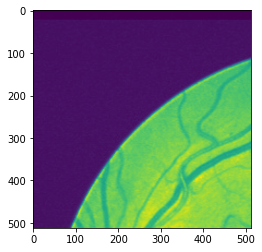

In [186]:
plt.imshow(test_images[0])

In [187]:
test_images = np.expand_dims(test_images, axis = -1)

In [188]:
test_images.shape

(180, 512, 512, 1)

In [189]:
test_images = test_images / 255

In [190]:
imgs_mask_test = model.predict(test_images, verbose=1)

180/180 [==============================] - 70s 387ms/step


In [191]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(512, 512)

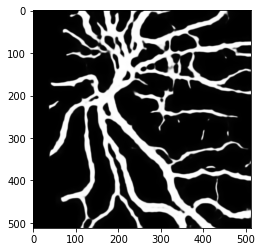

In [192]:
plt.imshow(imgs_mask_test[1], cmap='gray')

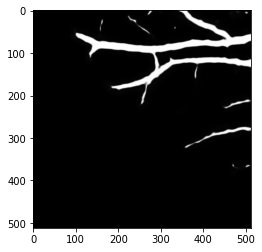

In [111]:
plt.imshow(i, cmap='gray')

In [112]:
yp = np.round(imgs_mask_test,0)

In [113]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(512, 512)

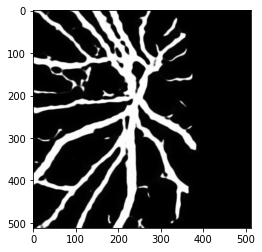

In [114]:
plt.imshow(i, cmap='gray')


In [115]:
PATH4 = 'Stare'

In [116]:
s_images=glob.glob(os.path.join(PATH4,'images','*.tiff'))
s_mask=glob.glob(os.path.join(PATH4,'1st_manual','*.GIF'))

In [117]:
if not os.path.exists('./Stare/output_images'):
    os.makedirs('./Stare/output_images')
src2 = "./Stare/images/"
dst2 = "./Stare/output_images/"
if not os.path.exists('./Stare/output_1st_manual'):
    os.makedirs('./Stare/output_1st_manual')
src3= "./Stare/1st_manual/"
dst3 = "./Stare/output_1st_manual/"

In [147]:
cropheight=350
cropwidth = 350
k=-1
for file in s_images:
    k+=1
    im = Image.open(s_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_images[k], i, j))
       files = [i for i in os.listdir(src2) if i.endswith(".tif") and path.isfile(path.join(src2, i))]
       for f in files:
        shutil.move(path.join(src2, f), dst2)

Stare\images\41_training.tiff (0, 0, 350, 350)
Stare\images\41_training.tiff (0, 350, 350, 700)
Stare\images\41_training.tiff (350, 0, 700, 350)
Stare\images\41_training.tiff (350, 350, 700, 700)
Stare\images\42_training.tiff (0, 0, 350, 350)
Stare\images\42_training.tiff (0, 350, 350, 700)
Stare\images\42_training.tiff (350, 0, 700, 350)
Stare\images\42_training.tiff (350, 350, 700, 700)
Stare\images\43_training.tiff (0, 0, 350, 350)
Stare\images\43_training.tiff (0, 350, 350, 700)
Stare\images\43_training.tiff (350, 0, 700, 350)
Stare\images\43_training.tiff (350, 350, 700, 700)
Stare\images\44_training.tiff (0, 0, 350, 350)
Stare\images\44_training.tiff (0, 350, 350, 700)
Stare\images\44_training.tiff (350, 0, 700, 350)
Stare\images\44_training.tiff (350, 350, 700, 700)
Stare\images\45_training.tiff (0, 0, 350, 350)
Stare\images\45_training.tiff (0, 350, 350, 700)
Stare\images\45_training.tiff (350, 0, 700, 350)
Stare\images\45_training.tiff (350, 350, 700, 700)
Stare\images\46_trai

In [119]:
cropheight=350
cropwidth = 350
k=-1
for file in s_mask:
    k+=1
    im = Image.open(s_mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_mask[k], i, j))
       files = [i for i in os.listdir(src3) if i.endswith(".tif") and path.isfile(path.join(src3, i))]
       for f in files:
        shutil.move(path.join(src3, f), dst3)

Stare\1st_manual\41_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\41_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\41_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\41_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\42_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\42_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\42_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\42_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\43_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\43_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\43_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\43_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\44_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\44_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\44_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\44_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\45_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\45_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\45_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\45_manual1.gif (

In [194]:
PATH5 = 'Stare'

In [195]:
t_images=glob.glob(os.path.join(PATH5,'output_images','*.tif'))

In [196]:
t_mask=glob.glob(os.path.join(PATH5,'output_1st_manual','*.tif'))

In [197]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(80, 512, 512)

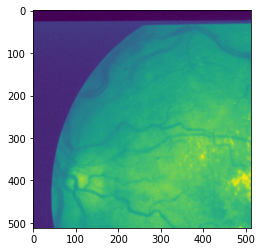

In [198]:
plt.imshow(test_images[0])

In [199]:
test_masks=np.array([get_data(path) for path in t_mask])
test_masks.shape

(80, 512, 512)

In [200]:
test_images = np.expand_dims(test_images, axis = -1)

In [201]:
test_masks = np.expand_dims(test_masks, axis = -1)

In [202]:
test_images.shape

(80, 512, 512, 1)

In [203]:
test_masks.shape

(80, 512, 512, 1)

In [204]:
test_images = test_images / 255

In [205]:
test_masks = test_masks / 255

In [206]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 29s 366ms/step


In [207]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(512, 512)

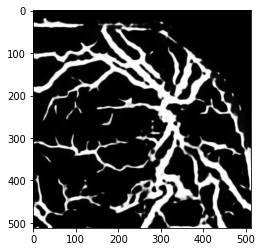

In [208]:
plt.imshow(i, cmap='gray')

In [209]:
yp = np.round(imgs_mask_test,0)

In [210]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(512, 512)

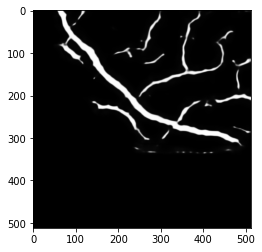

In [211]:
plt.imshow(i, cmap='gray')
plt.imsave('drive.png', i, cmap='gray')

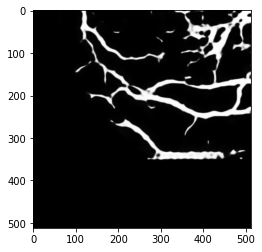

In [212]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [217]:
score= model.evaluate(test_masks,imgs_mask_test, verbose=1)

80/80 [==============================] - 31s 387ms/step


In [214]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.8074313879013062
Test accuracy: 0.21927618980407715


In [141]:
np.min(test_images)

0.0

In [142]:
np.max(test_images)

0.9725490196078431

In [143]:
np.min(test_masks)

0.0

In [144]:
np.max(test_masks)

1.0

In [145]:
np.min(imgs_mask_test)

0.0

In [146]:
np.max(imgs_mask_test)

0.99992156

In [149]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 28s 351ms/step


In [ ]:
if not os.path.exists('./Stare/predict'):
    os.makedirs('./Stare/predict')
src4= "./Stare/1st_manual/"
dst4 = "./Stare/predict/"

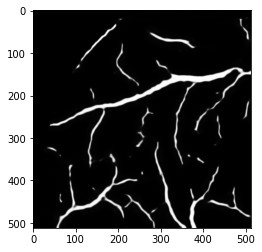

In [175]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

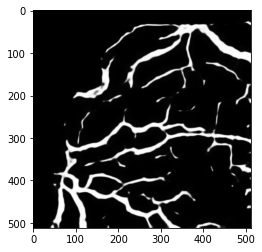

In [182]:
plt.imshow(imgs_mask_test[0], cmap='gray')

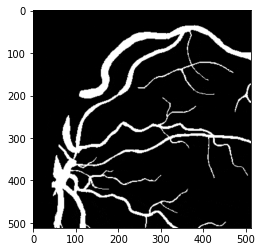

In [193]:
plt.imshow(test_masks[0], cmap='gray')

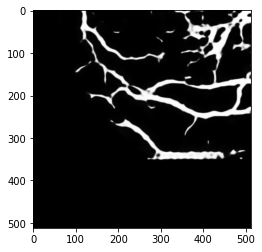

In [218]:
plt.imshow(imgs_mask_test[1], cmap='gray')

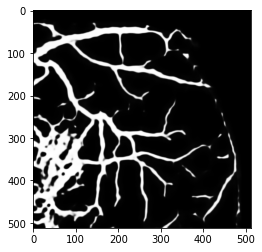

In [219]:
plt.imshow(imgs_mask_test[2], cmap='gray')

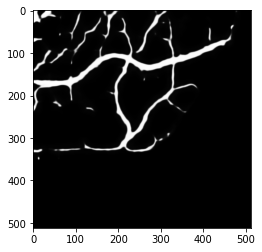

In [220]:
plt.imshow(imgs_mask_test[3], cmap='gray')